# Comparing models

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


In [3]:
dist1 = np.load('fixed1.npz')
dist2 = np.load('fixed2.npz')
scores1 = np.asarray([dist1['scores']]).flatten()
scores2 = np.asarray([dist2['scores']]).flatten()
scores1.sort()
scores2.sort()
results = np.vstack([scores1, scores2])
print(results.shape)
logresults = np.log10(results + 1)


(2, 1000)


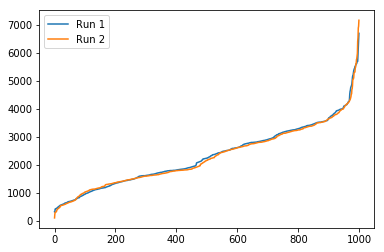

In [4]:
for i in range(2):
    plt.plot(results[i])
plt.legend(['Run 1','Run 2'])


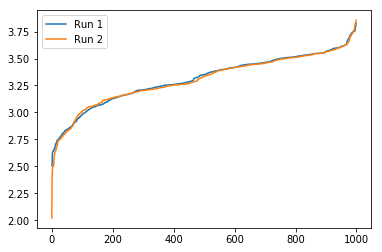

In [5]:
for i in range(2):
    plt.plot(logresults[i])
plt.legend(['Run 1','Run 2'])


In [7]:
# KS stats for sampling error for n=1000.
# Sampling from the same distribution gives
# a k-stat of 0.032 and p of 0.68
# 1000 samples should have enough stat power
# to resolve small differences in performance
stats.ks_2samp(logresults[0], logresults[1])


Ks_2sampResult(statistic=0.03199999999999997, pvalue=0.6785103823828913)

# Initial training
Evaluate trained models by comparing their performance.  
First training for 100 epochs on 10 fixed order mcts games.

### From early midgame

In [2]:
results = []
for i in [0, 49, 99]:
    dist = np.load('0_10_epox100_lr0.1_e{}.npz'.format(i))
    scores = np.asarray([dist['scores']]).flatten()
    scores.sort()
    results.append(scores)
results = np.vstack(results)
print(results.shape)
logresults = np.log10(results + 1)


(3, 1000)


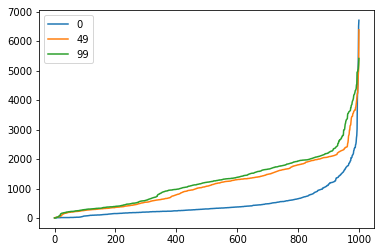

In [3]:
for i in range(len(results)):
    plt.plot(results[i])
plt.legend([0, 49, 99])


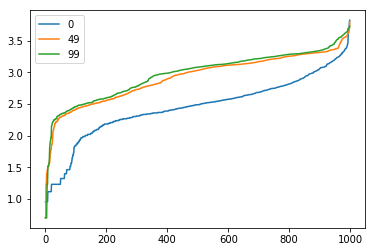

In [4]:
for i in range(len(logresults)):
    plt.plot(logresults[i])
plt.legend([0, 49, 99])


In [5]:
print(stats.ks_2samp(logresults[0], logresults[2]))
print(stats.ks_2samp(logresults[1], logresults[2]))


Ks_2sampResult(statistic=0.504, pvalue=5.587863354159026e-112)
Ks_2sampResult(statistic=0.07, pvalue=0.014097547738750731)


### From start

In [7]:
results = []
for i in [0, 49, 99]:
    dist = np.load('0_10_epox100_lr0.1_e{}_start.npz'.format(i))
    scores = np.asarray([dist['scores']]).flatten()
    scores.sort()
    results.append(scores)
results = np.vstack(results)
print(results.shape)
logresults = np.log10(results + 1)


(3, 1000)


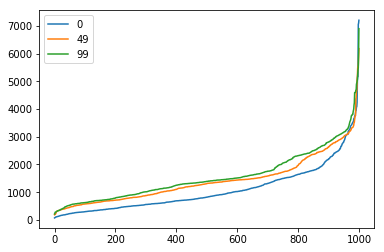

In [8]:
for i in range(len(results)):
    plt.plot(results[i])
plt.legend([0, 49, 99])


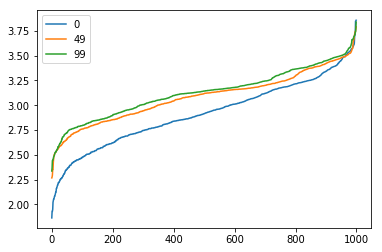

In [9]:
for i in range(len(logresults)):
    plt.plot(logresults[i])
plt.legend([0, 49, 99])


In [10]:
print(stats.ks_2samp(logresults[0], logresults[2]))
print(stats.ks_2samp(logresults[1], logresults[2]))


Ks_2sampResult(statistic=0.304, pvalue=5.194893269078377e-41)
Ks_2sampResult(statistic=0.07400000000000001, pvalue=0.007873852459750459)


### Compared with fixed
Trained model performs better than random, but not better than fixed order

In [11]:
dist1 = np.load('fixed1.npz')
dist2 = np.load('0_10_epox100_lr0.1_e{}_start.npz'.format(99))
scores1 = np.asarray([dist1['scores']]).flatten()
scores2 = np.asarray([dist2['scores']]).flatten()
scores1.sort()
scores2.sort()
results = np.vstack([scores1, scores2])
print(results.shape)
logresults = np.log10(results + 1)


(2, 1000)


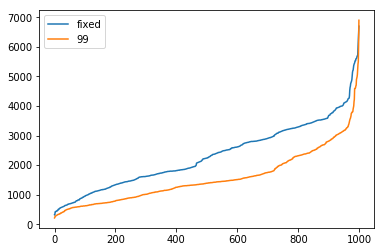

In [15]:
for i in range(len(results)):
    plt.plot(results[i])
plt.legend(['fixed', '99'])


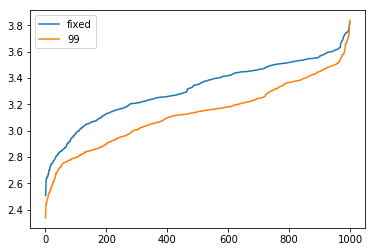

In [16]:
for i in range(len(logresults)):
    plt.plot(logresults[i])
plt.legend(['fixed','99'])


In [12]:
print(stats.ks_2samp(logresults[0], logresults[1]))


Ks_2sampResult(statistic=0.358, pvalue=1.0386480044592873e-56)
